<a href="https://colab.research.google.com/github/rockingsr/Machine_Learning_project/blob/master/car_analysis_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import pandas as pd 
#import pandas.util.testing as pd
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline 
import warnings   # 

Q1:**Import the dataset and the necessary libraries, check datatype, statistical summary,shape, null values**

In [171]:
data=pd.read_csv("data.csv") #Importing Dataset
dobj=pd.DataFrame(data)      #Check Datatype
dobj.dtypes    

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [172]:
data.describe()    #Statistical Summary

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [173]:
data.shape      #Shape

(11914, 16)

In [174]:
#dobj.isnull                #used to look the value in tabular format
#dobj.isnull.sum()          #used to look the count of null values column vise.
dobj.isnull().sum().sum()   #used to look the total count of the null values
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Q2:Are there any columns in the dataset which you think are of less relevance. If so, give your reasoning and drop them**

In [175]:
data.drop(columns={"Vehicle Style"}, inplace=True)        #After considering Vehicle Size "Vehicle Style" is looking as useless as most of the things are descibed there
data.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,28,20,3916,36350


**Q3: Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"**


In [176]:
#RENAMING
data=data.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'})

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  object 
 1   Model             11914 non-null  object 
 2   Year              11914 non-null  int64  
 3   Engine Fuel Type  11911 non-null  object 
 4   HP                11845 non-null  float64
 5   Cylinders         11884 non-null  float64
 6   Transmission      11914 non-null  object 
 7   Drive Mode        11914 non-null  object 
 8   Number of Doors   11908 non-null  float64
 9   Market Category   8172 non-null   object 
 10  Vehicle Size      11914 non-null  object 
 11  MPG-H             11914 non-null  int64  
 12  MPG-C             11914 non-null  int64  
 13  Popularity        11914 non-null  int64  
 14  Price             11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


**Q4:Check for any duplicates in the data, check for null values and missing data and remove them.**

In [178]:
data.shape # original data

(11914, 15)

In [179]:
data.duplicated().sum() #checking duplicate data

775

In [180]:
data.drop_duplicates(inplace=True)  #removing duplicate data
data.shape

(11139, 15)

In [181]:
data.dropna(axis=0,inplace=True)     # Removing the Null Values in the dataset
data.shape

(7704, 15)

**Q5: Plot graphs of various columns to check for outliers and remove those data points from the dataset.**


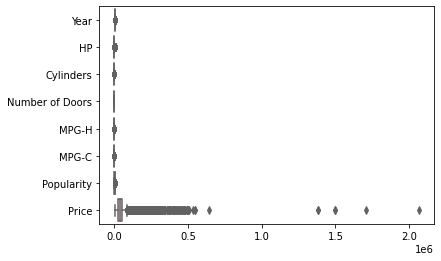

In [182]:
import seaborn as sns
sns.boxplot(data=data,orient='h',palette='Set3')             #detecting the outliers before treating them

In [183]:
Q1 = data.quantile(0.25)                # calculating the Quartile and then removing the outliers
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

Year                   6.00
HP                   130.00
Cylinders              2.00
Number of Doors        2.00
MPG-H                  8.00
MPG-C                  6.00
Popularity          1489.00
Price              23208.75
dtype: float64


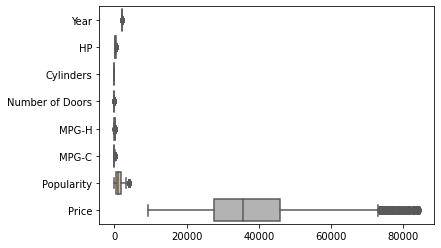

In [184]:
sns.boxplot(data=data,orient='h',palette='Set2')               #outliers in particular after treating it

**Q6:What car brands are the most represented in the dataset and find the average price among the top car brands**

In [185]:
array=data["Make"].value_counts()[:10].index.tolist()    #Finding the top 10 most represented cars in the dataset
array1=data.groupby("Make")['Price'].mean().to_dict()     #Calculating mean of every car and storing it in dictionary
top_car_brands={}
for i in range(0,10):                                    #Finding the mean price of top cars and storing to other dictionary 
  top_car_brands[i+1]={array[i] : array1[array[i]]}
print("The average price among the top car brands are : \n")  
top_car_brands                                            # Printing the selected values from the dataset

The average price among the top car brands are : 



{1: {'Chevrolet': 34804.25614035088},
 2: {'Volkswagen': 30344.291443850267},
 3: {'Cadillac': 55198.32647058823},
 4: {'Infiniti': 44573.71382636656},
 5: {'Nissan': 33645.87686567164},
 6: {'GMC': 37863.72556390977},
 7: {'Dodge': 30237.995867768594},
 8: {'Audi': 49878.166666666664},
 9: {'BMW': 52358.31914893617},
 10: {'Toyota': 32376.596244131455}}

**Q7: Plot the correlation matrix and document your insights.**

                     Year        HP  Cylinders  ...     MPG-C  Popularity     Price
Year             1.000000  0.150692  -0.174236  ...  0.320689    0.193698  0.223812
HP               0.150692  1.000000   0.772048  ... -0.646811    0.089230  0.757789
Cylinders       -0.174236  0.772048   1.000000  ... -0.749138    0.021717  0.517959
Number of Doors  0.122012 -0.038910  -0.002679  ...  0.003985   -0.098196  0.015442
MPG-H            0.345236 -0.558011  -0.709704  ...  0.924201    0.109362 -0.307554
MPG-C            0.320689 -0.646811  -0.749138  ...  1.000000    0.062278 -0.381413
Popularity       0.193698  0.089230   0.021717  ...  0.062278    1.000000  0.140909
Price            0.223812  0.757789   0.517959  ... -0.381413    0.140909  1.000000

[8 rows x 8 columns]


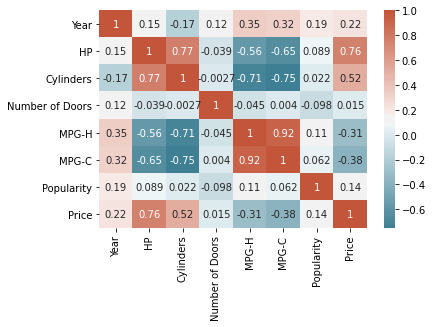

In [186]:
 # calculate correlation matrix
corr = data.corr()    
print(corr)                # plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


**Q8:Perform EDA and plot different graphs and document your findings (Try to see how other variables affect the price of the car)**

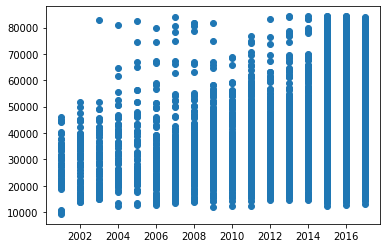

In [187]:
plt.scatter(x=data["Year"],y=data["Price"])    #As per question various steps of EDA are 1 :Understanding your variables
                                                                                       # 2 :Cleaning your dataset
                                                                                       # 3 :Analyzing relationships between variables
         # First two steps are already been completed above so now working further for step 3                          

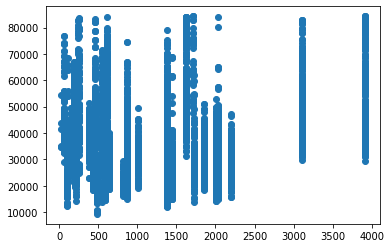

In [188]:
plt.scatter(x=data["Popularity"],y=data["Price"])

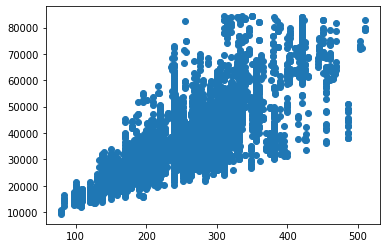

In [189]:
plt.scatter(x=data["HP"],y=data["Price"])

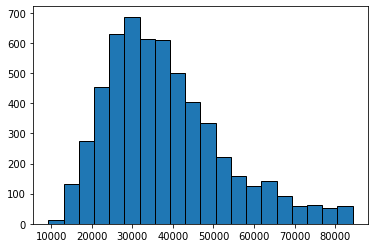

In [190]:
plt.hist(x=data["Price"],bins=20,edgecolor='Black')
plt.show()

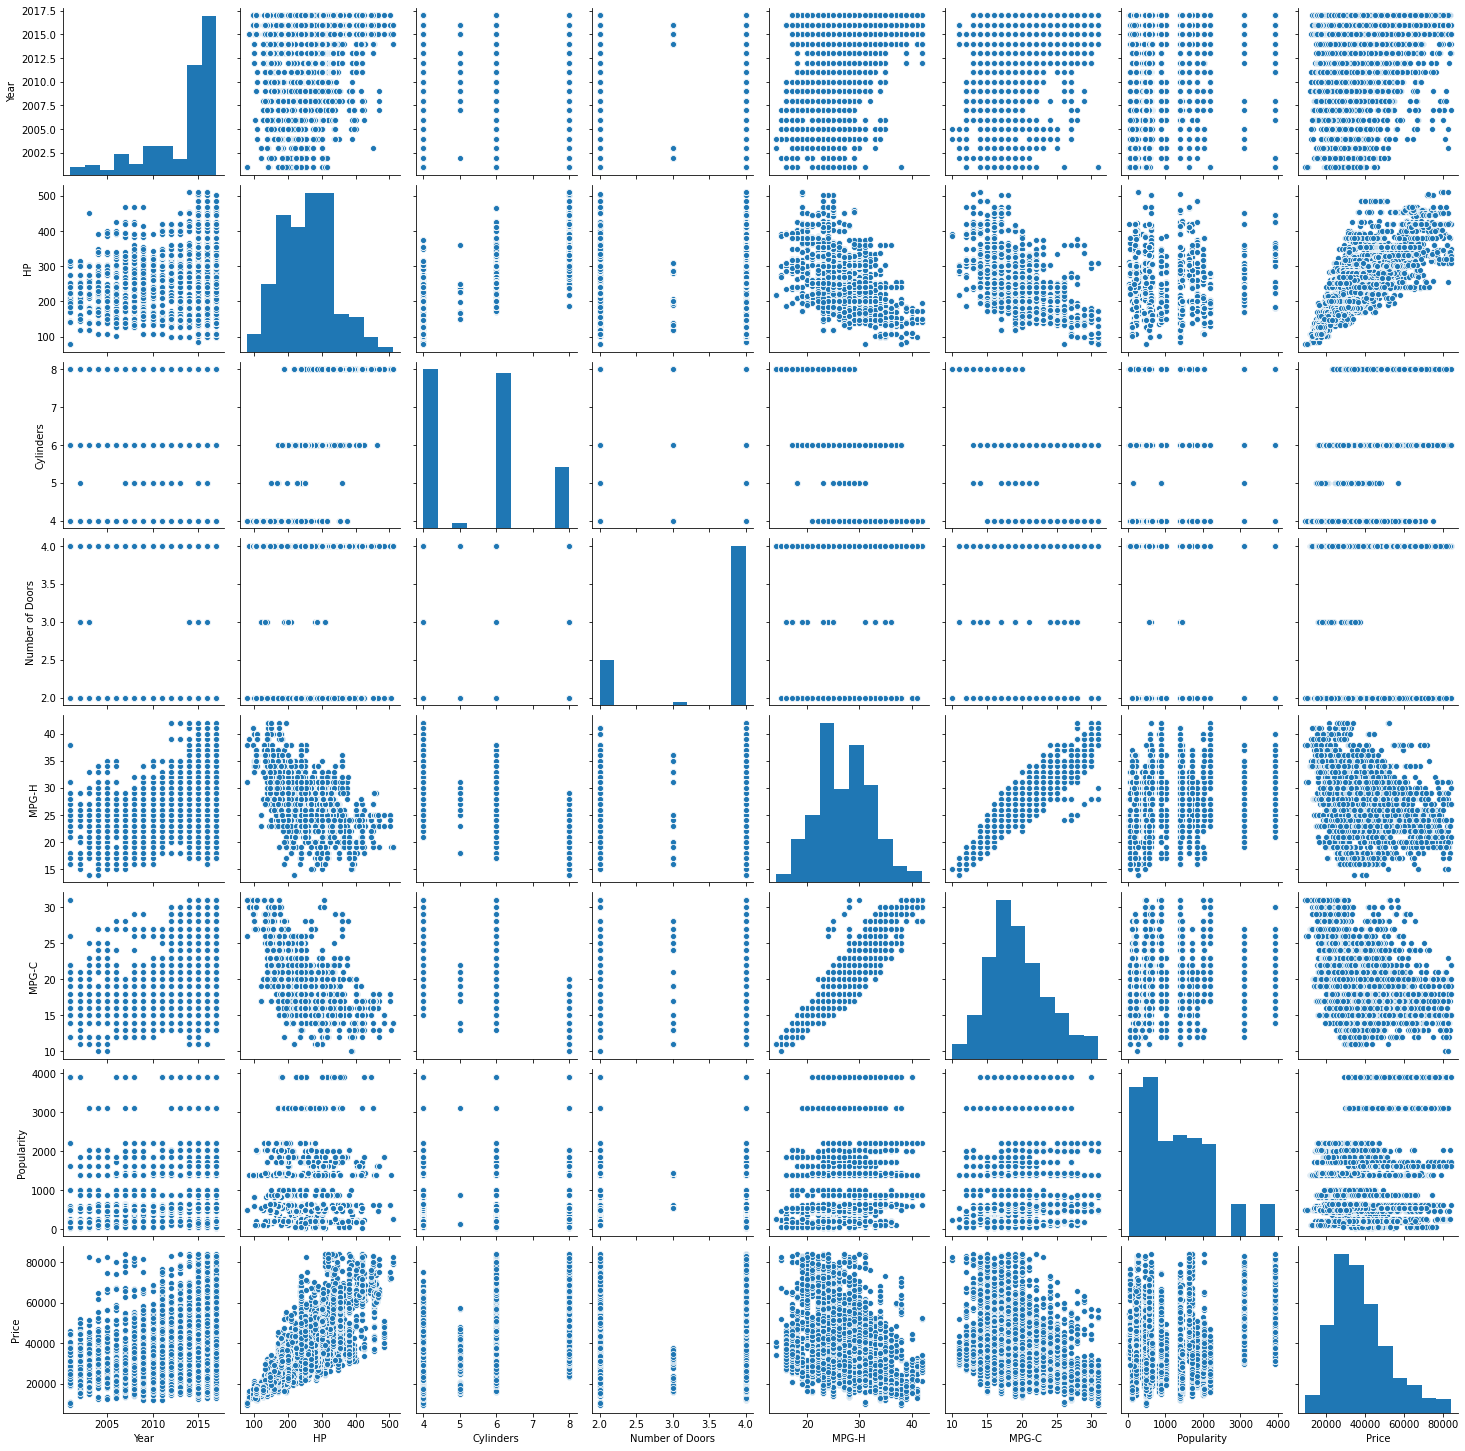

In [191]:
sns.pairplot(data)

**Q9:(Extra Credits)Split the dataset into 80 and 20 ratio and build a machine learning model with Price as the target variable**

In [192]:
columns_to_convert=['Make','Model','Engine Fuel Type','Transmission','Vehicle Size']
data[columns_to_convert] = data[columns_to_convert].astype('category')

In [193]:
data.dtypes

Make                category
Model               category
Year                   int64
Engine Fuel Type    category
HP                   float64
Cylinders            float64
Transmission        category
Drive Mode            object
Number of Doors      float64
Market Category       object
Vehicle Size        category
MPG-H                  int64
MPG-C                  int64
Popularity             int64
Price                  int64
dtype: object

In [194]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in ['Make','Model','Engine Fuel Type','Transmission','Vehicle Size']: data[col] = label_encoder.fit_transform(data[col])

In [195]:
x = data[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y = data['Price'].values
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

In [196]:
from sklearn.model_selection import train_test_split as tts                      
                                                     #creating the MSRP as the target variable
train_x, test_x , train_y, test_y = tts( x, y , test_size = 0.2)    #Spliting the data into the 80:20 ratio 
print(x_train.shape, y_train.shape)
print(test_x.shape, test_y.shape)

(4495, 6) (4495, 1)
(1124, 6) (1124, 1)


**Q10: Try different algorithms and check their performance over metrics like R square, RMSE, MAE, etc and document your findings**

**Linear Regression**

In [197]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(train_x,train_y)

print("Training Accuracy:",lr_model.score(train_x,train_y))
print("Testing Accuracy:",lr_model.score(test_x,test_y))

Training Accuracy: 0.5942261347736912
Testing Accuracy: 0.6189910343121383


In [198]:
predic=lr_model.predict(test_x)
predic[0:5]

array([[-1.19490858],
       [-0.55047629],
       [-0.48032264],
       [ 0.60567917],
       [ 0.38830135]])

Text(0, 0.5, 'Predicted Values')

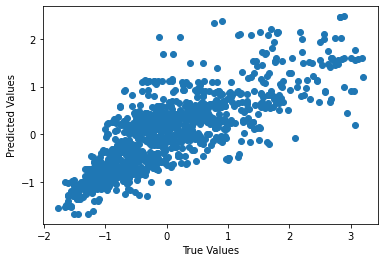

In [199]:
plt.scatter(test_y,predic)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

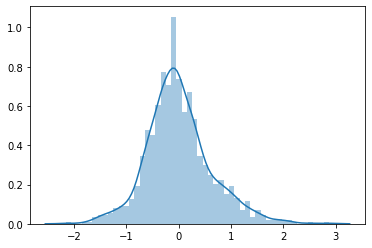

In [200]:
sns.distplot((test_y-predic),bins=50)

In [201]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print("R2_Score : ", r2_score(test_y,predic))
print("Mean Squared Error : ", mean_squared_error(test_y,predic))
print("MAE : ",mean_absolute_error(test_y,predic))
print("RSME : ",math.sqrt(mean_squared_error(test_y,predic)))

R2_Score :  0.6189910343121383
Mean Squared Error :  0.3878946502748167
MAE :  0.4663817027105175
RSME :  0.6228118899594136


In [202]:
results_data = pd.DataFrame(data=[["Linear Regression", 
                                   lr_model.score(train_x,train_y),
                                   lr_model.score(test_x,test_y),
                                   r2_score(test_y,predic),
                                   mean_squared_error(test_y,predic),
                                   mean_absolute_error(test_y,predic),
                                   math.sqrt(mean_squared_error(test_y,predic))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RSME'])

results_data

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RSME
0,Linear Regression,0.594226,0.618991,0.618991,0.387895,0.466382,0.622812


**Support Vector Machine**

In [203]:
from sklearn.svm import SVR
svr_model=SVR(kernel = 'rbf')
svr_model.fit(train_x,train_y)

# calculating the accuracies
print("Training Accuracy :",svr_model.score(train_x,train_y))
print("Testing Accuracy :",svr_model.score(test_x,test_y))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 0.7154576602521658
Testing Accuracy : 0.7405455115470119


In [204]:
y_pred = svr_model.predict(test_x)
y_pred[0:5]

array([-1.48622604, -0.69588394, -0.80487923,  0.09161714,  0.19098522])

Text(0, 0.5, 'Predicted Values')

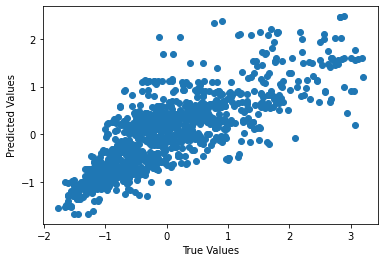

In [205]:
plt.scatter(test_y,predic)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

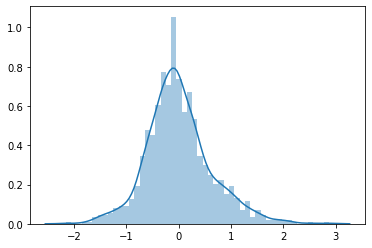

In [206]:
sns.distplot((test_y-predic),bins=50)

In [207]:
print("R2_Score : ", r2_score(test_y,predic))
print("Mean Squared Error : ", mean_squared_error(test_y,predic))
print("MAE : ",mean_absolute_error(test_y,predic))
print("RSME : ",math.sqrt(mean_squared_error(test_y,predic)))

R2_Score :  0.6189910343121383
Mean Squared Error :  0.3878946502748167
MAE :  0.4663817027105175
RSME :  0.6228118899594136


In [208]:
results_data_2 = pd.DataFrame(data=[["Super Vector Machine", 
                                   svr_model.score(train_x,train_y),
                                   svr_model.score(test_x,test_y),
                                   r2_score(test_y,predic),
                                   mean_squared_error(test_y,predic),
                                   mean_absolute_error(test_y,predic),
                                   math.sqrt(mean_squared_error(test_y,predic))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RSME'])
results_data = results_data.append(results_data_2, ignore_index=True)
results_data

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RSME
0,Linear Regression,0.594226,0.618991,0.618991,0.387895,0.466382,0.622812
1,Super Vector Machine,0.715458,0.740546,0.618991,0.387895,0.466382,0.622812


**Random forest**

In [209]:
from sklearn.ensemble import RandomForestRegressor

rfc_model=RandomForestRegressor(n_estimators=300,random_state=0)
rfc_model.fit(train_x,train_y)

# calculating the accuracies
print("Training Accuracy :",rfc_model.score(train_x,train_y))
print("Testing Accuracy :",rfc_model.score(test_x,test_y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Accuracy : 0.9539448338473882
Testing Accuracy : 0.9092616789146057


Text(0, 0.5, 'Predicted Values')

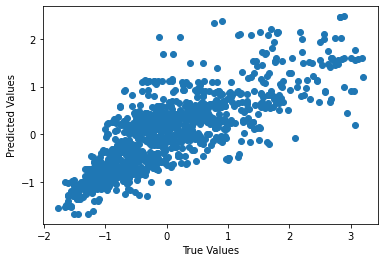

In [210]:
plt.scatter(test_y,predic)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

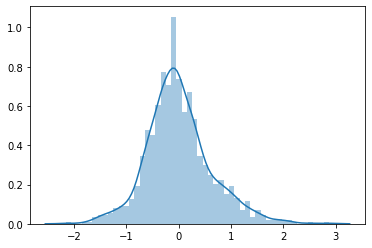

In [211]:
sns.distplot((test_y-predic),bins=50)


In [212]:
print("R2_Score : ", r2_score(test_y,predic))
print("Mean Squared Error : ", mean_squared_error(test_y,predic))
print("MAE : ",mean_absolute_error(test_y,predic))
print("RSME : ",math.sqrt(mean_squared_error(test_y,predic)))

R2_Score :  0.6189910343121383
Mean Squared Error :  0.3878946502748167
MAE :  0.4663817027105175
RSME :  0.6228118899594136


In [213]:
results_data_3 = pd.DataFrame(data=[["Random Forest", 
                                   rfc_model.score(train_x,train_y),
                                   rfc_model.score(test_x,test_y),
                                   r2_score(test_y,predic),
                                   mean_squared_error(test_y,predic),
                                   mean_absolute_error(test_y,predic),
                                   math.sqrt(mean_squared_error(test_y,predic))]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RSME'])
results_data = results_data.append(results_data_3, ignore_index=True)
results_data

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RSME
0,Linear Regression,0.594226,0.618991,0.618991,0.387895,0.466382,0.622812
1,Super Vector Machine,0.715458,0.740546,0.618991,0.387895,0.466382,0.622812
2,Random Forest,0.953945,0.909262,0.618991,0.387895,0.466382,0.622812


**So, from the above table, the best suitable algorithm for the give dataset is "Random Forest" with an accuracy of "90%".**